**Jeux de donnée de base**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = pd.read_csv('cleaned_nutrition_dataset.csv', index_col='food')
X

,Vitamin C,Vitamin B11,Sodium,Calcium,Carbohydrates,Iron,Caloric Value,Sugars,Dietary Fiber,Fat,Protein,food_normalized
food,,,,,,,,,,,,
margarine with yoghurt,0.082,0.086,0.018,2.80,0.073,0.027,88.0,0.00,0.0,9.8,0.058,margarine with yoghurt
sunflower seed butter,0.400,0.005,0.065,10.20,3.700,0.700,99.0,1.70,0.9,8.8,2.800,sunflower seed butter
hazelnut oil,0.000,0.000,0.000,0.00,0.000,0.000,120.0,0.00,0.0,13.6,0.000,hazelnut oil
menhaden fish oil,0.000,0.000,0.000,0.00,0.000,0.000,1966.0,0.00,0.0,218.0,0.000,menhaden fish oil
cod liver fish oil,0.000,0.000,0.000,0.00,0.000,0.000,123.0,0.00,0.0,13.6,0.000,cod liver fish oil
...,...,...,...,...,...,...,...,...,...,...,...,...
clam chowder,0.300,0.075,0.300,21.94,25.000,0.700,250.0,0.92,2.0,10.0,12.000,clam chowder
crab cakes,0.300,0.075,0.300,21.94,20.000,0.700,270.0,0.92,2.0,15.0,18.000,crab cakes
creme brulee,0.300,0.075,0.200,21.94,35.000,0.700,300.0,0.92,0.0,16.0,7.000,creme brulee


In [30]:
#On retire les variables inutiles car pas d'info à tirer

X_bis = X.drop(columns=['food_normalized'])

#On enlève les valeurs abérantes (on garde les valeurs cohérentes)
X_bis = X_bis[X_bis['Vitamin C'] < 1000]
X_bis = X_bis[X_bis['Sugars'] < 200]
X_bis = X_bis[X_bis['Protein'] < 300]
X_bis = X_bis[X_bis['Iron'] < 80]
X_bis = X_bis[X_bis['Carbohydrates'] < 300]
X_bis = X_bis[X_bis['Caloric Value'] < 4000]
X_bis = X_bis[X_bis['Fat'] < 300]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_bis)
X_normalized = pd.DataFrame(X_normalized, columns=X_bis.columns, index=X_bis.index)
#X_normalized = X_normalized.drop(columns=['Vitamin B11', 'Sugars', 'Iron', 'Caloric Value', 'Dietary Fiber', 'Sodium', 'Calcium'])
X_normalized

,Vitamin C,Vitamin B11,Sodium,Calcium,Carbohydrates,Iron,Caloric Value,Sugars,Dietary Fiber,Fat,Protein
food,,,,,,,,,,,
margarine with yoghurt,-0.328966,-0.336496,-0.145659,-0.495090,-0.741437,-0.464846,-0.511068,-0.491648,-0.455159,-0.066417,-0.526436
sunflower seed butter,-0.316257,-0.338885,-0.145611,-0.422548,-0.596273,-0.253781,-0.466905,-0.340089,-0.265903,-0.115937,-0.379605
hazelnut oil,-0.332243,-0.339033,-0.145677,-0.522538,-0.744359,-0.473314,-0.382593,-0.491648,-0.455159,0.121757,-0.529542
menhaden fish oil,-0.332243,-0.339033,-0.145677,-0.522538,-0.744359,-0.473314,7.028793,-0.491648,-0.455159,10.243564,-0.529542
cod liver fish oil,-0.332243,-0.339033,-0.145677,-0.522538,-0.744359,-0.473314,-0.370549,-0.491648,-0.455159,0.121757,-0.529542
...,...,...,...,...,...,...,...,...,...,...,...
clam chowder,-0.320253,-0.336821,-0.145370,-0.307462,0.256222,-0.253781,0.139335,-0.409628,-0.034590,-0.056514,0.113046
crab cakes,-0.320253,-0.336821,-0.145370,-0.307462,0.056106,-0.253781,0.219632,-0.409628,-0.034590,0.191084,0.434340
creme brulee,-0.320253,-0.336821,-0.145472,-0.307462,0.656455,-0.253781,0.340077,-0.409628,-0.455159,0.240604,-0.154699


<Axes: >

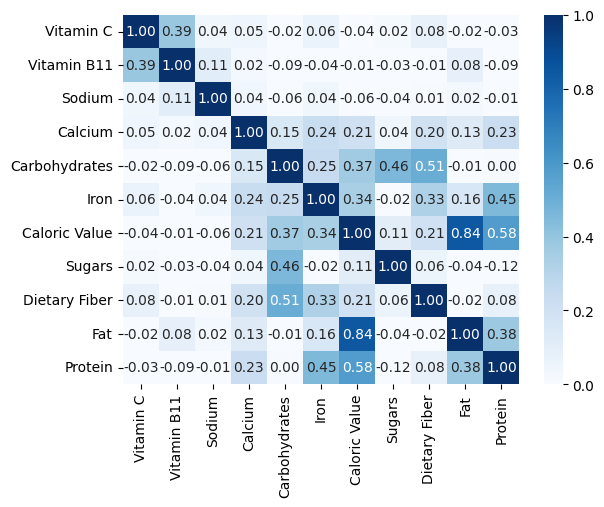

In [31]:
corr = X_normalized.corr()
sns.heatmap(corr, vmin=0, vmax=1, cmap='Blues', annot=True, fmt='.2f')

ACP

<BarContainer object of 11 artists>

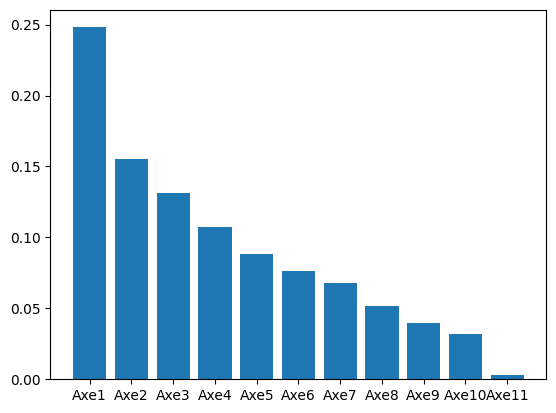

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
X_normalized_pca = pca.fit_transform(X_normalized)
type(X_normalized_pca)

plt.bar(["Axe1", "Axe2", "Axe3", "Axe4", "Axe5", "Axe6", "Axe7", "Axe8", "Axe9", "Axe10", "Axe11"], pca.explained_variance_ratio_)


<Axes: xlabel='PC1', ylabel='PC2'>

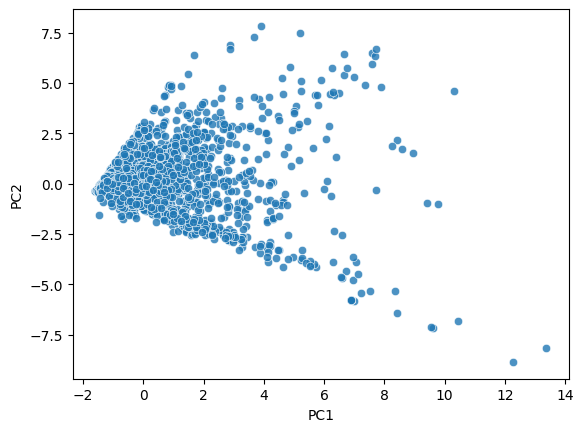

In [33]:
X_normalized_pca = pd.DataFrame(X_normalized_pca, columns=[f"PC{i+1}" for i in range(X_normalized.shape[1])])
sns.scatterplot(x="PC1", y="PC2", data=X_normalized_pca, alpha=0.8)

<Axes: xlabel='PC1', ylabel='PC2'>

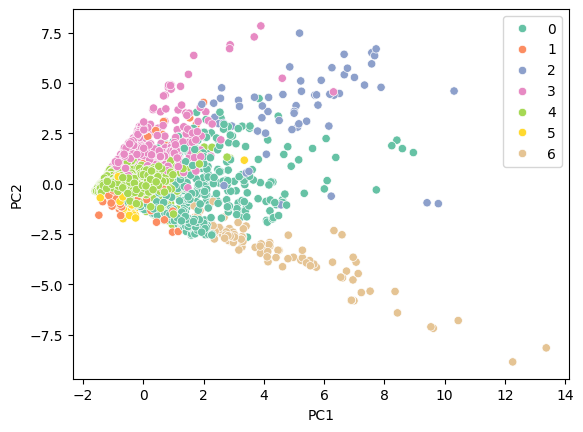

In [34]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 7
model = AgglomerativeClustering(n_clusters=n_clusters)
labels = model.fit_predict(X_normalized)

X_normalized['Classe'] = labels

sns.scatterplot(x="PC1", y="PC2", data=X_normalized_pca, hue=labels, palette="Set2")

In [27]:
X_normalized_with_columns = X_normalized[['Classe']]
X_normalized_with_columns.to_csv('nutrition_dataset_with_7_clusters_acp.csv', index=True)

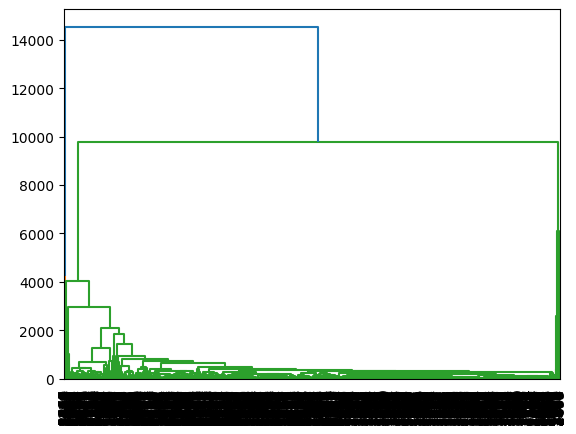

In [35]:
from sklearn.cluster import AgglomerativeClustering
cls = AgglomerativeClustering(linkage="complete", metric="euclidean", n_clusters=None, distance_threshold=0)
cls.fit(X_bis)

from src.utils import plot_dendrogram
plot_dendrogram(cls)

AFTD

In [36]:
from sklearn.manifold import MDS
aftd = MDS(n_components=2, dissimilarity="euclidean")
dist = aftd.fit_transform(X_normalized)
dist

KeyboardInterrupt: 

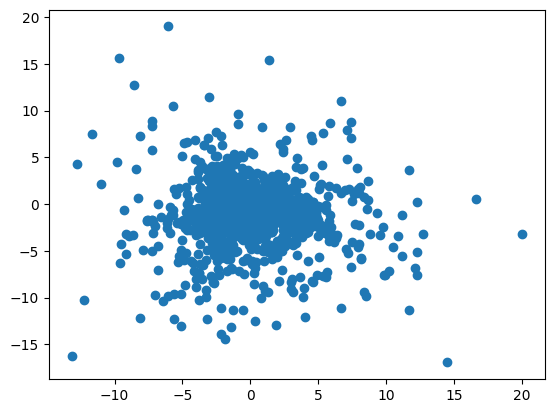

In [ ]:
plt.scatter(*dist.T)

In [16]:
from sklearn.manifold import MDS
#Avec 6 classes
model = AgglomerativeClustering(metric="euclidean", linkage="ward", n_clusters=6).fit(X_normalized)
labels = model.labels_

aftd = MDS(n_components=2, dissimilarity="euclidean")
dist = aftd.fit_transform(X_normalized)

df = pd.DataFrame({"x": dist[:, 0], "y": dist[:, 1], "étiquette": labels})
sns.scatterplot(x="x", y="y", hue="étiquette", data=df)
plt.show()


KeyboardInterrupt: 

In [ ]:

type(labels)
#X = np.concatenate((X, labels.reshape(labels.T.shape[0], 1)), axis=1)
X_bis['Classe'] = labels.T
X_bis
X_bis.to_csv('nutrition_dataset_with_clusters.csv', index=True)

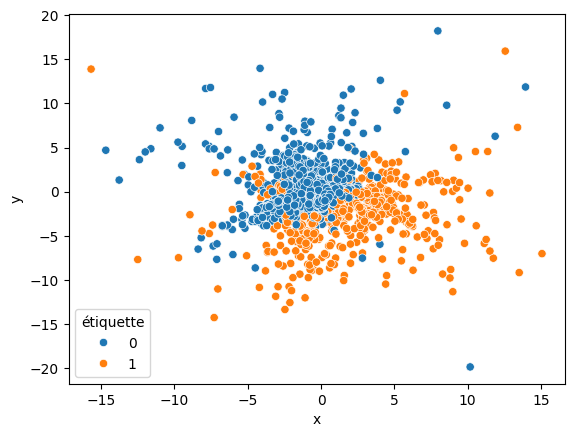

In [ ]:
from sklearn.manifold import MDS

model = AgglomerativeClustering(metric="euclidean", linkage="ward", n_clusters=2).fit(X_normalized) #On crée le modèle avec 2 classes
labels = model.labels_

aftd = MDS(n_components=2, dissimilarity="euclidean") #On crée le tableau de distance en affichant les 2 classes
dist = aftd.fit_transform(X_normalized)


df = pd.DataFrame({"x": dist[:, 0], "y": dist[:, 1], "étiquette": labels})
sns.scatterplot(x="x", y="y", hue="étiquette", data=df, alpha=0.5)

from src.utils import add_labels
add_labels(dist[:,0], dist[:,1], X_bis.index)
plt.show()

In [19]:
X_bis['Classe'] = labels.T
X_bis
X_bis.to_csv('nutrition_dataset_with_4clusters.csv', index=True)

X_normalized["Classe"] = labels.T
X_normalized.to_csv('nutrition_dataset_with_clusters_normalized.csv', index=True)

(array([0.39471617, 0.22972997, 0.47460921, ..., 1.10368883, 0.54710584,
        0.64206   ], shape=(5911641,)),
 array([0.40308438, 0.22782506, 0.48636263, ..., 1.08674404, 0.47694519,
        0.62137643], shape=(5911641,)))

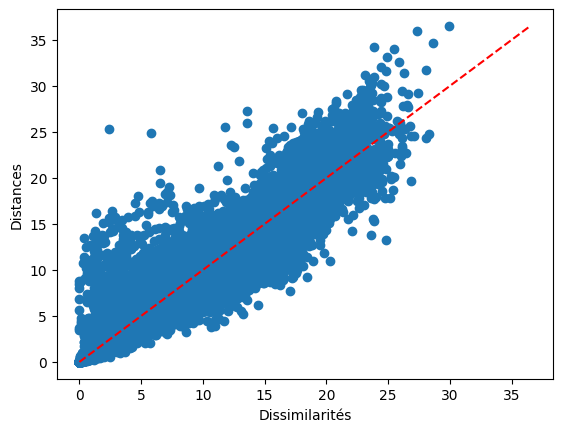

In [190]:
aftd = MDS(n_components=6, dissimilarity="euclidean")
dist = aftd.fit_transform(X_normalized)


from src.utils import plot_Shepard
plot_Shepard(aftd)